In [1]:
from Parameters import *
from Simulator import Simulator
from Utility import Utility
import matplotlib.pyplot as plt

### Statistics Test:


Average Genome Length: 8842452.813476562 
Initial Genome Length: 500000.0


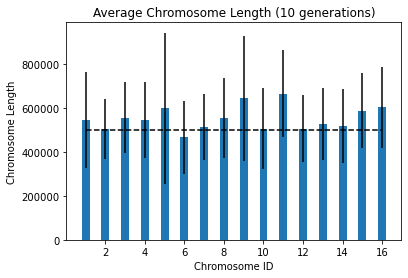

In [2]:
simul = Simulator(chromosome_table, number_of_generations, average_events_number, cumulative_list, \
     n_events_distrib, del_len_distrib, ins_len_distrib, transl_len_distrib, dupl_len_distrib )

initial_genome_len = sum([len(seq) for id, seq in chromosome_table])
initial_ave_len = initial_genome_len / len(chromosome_table)

print("\nAverage Genome Length:", simul.average_genome_length, "\nInitial Genome Length:", initial_ave_len)
fig, ax = plt.subplots()
plt.bar(range(1, chromosome_number + 1), simul.average_chromosome_length, \
    yerr = simul.chr_length_st_dev, width = 0.4)
    
ax.plot([1., 16], [initial_ave_len, initial_ave_len], "k--")
plt.xlabel("Chromosome ID")
plt.ylabel("Chromosome Length")
plt.title(f"Average Chromosome Length ({number_of_generations} generations)")
plt.show()

### Reconstruciton Test:

In [2]:
import time as tm

tool = Utility()
n_generations_to_test = 11
times = []
mem = []
for n_g in range(n_generations_to_test):
    print(f"Number of generations: {n_g}")
    simul = Simulator(chromosome_table, n_g, average_events_number, cumulative_list, \
                n_events_distrib, del_len_distrib, ins_len_distrib, transl_len_distrib, dupl_len_distrib )

    start = tm.time()
    simul.reconstructor(simul.parent, n_g, chromosome_table)
    times.append(tm.time() - start)

    
    
    tot_mem, py_mem = tool.mem_count()
    mem.append(py_mem)

    print(f"total memory: {tot_mem} Mb,\npython memory: {py_mem} Mb \n")       

Number of generations: 0
total memory: 10568.1953125 Mb,
python memory: 100.0 Mb 

Number of generations: 1
total memory: 10577.1953125 Mb,
python memory: 103.0 Mb 

Number of generations: 2
total memory: 10599.1796875 Mb,
python memory: 115.0 Mb 

Number of generations: 3
total memory: 10612.08203125 Mb,
python memory: 122.0 Mb 

Number of generations: 4
total memory: 10646.29296875 Mb,
python memory: 152.0 Mb 

Number of generations: 5
total memory: 10593.546875 Mb,
python memory: 190.0 Mb 

Number of generations: 6
total memory: 10632.3671875 Mb,
python memory: 314.0 Mb 

Number of generations: 7
total memory: 10911.74609375 Mb,
python memory: 503.0 Mb 

Number of generations: 8
total memory: 11244.7265625 Mb,
python memory: 954.0 Mb 

Number of generations: 9
total memory: 12121.51953125 Mb,
python memory: 1792.0 Mb 

Number of generations: 10
total memory: 14278.12109375 Mb,
python memory: 3720.0 Mb 



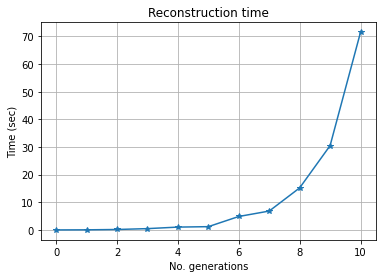

In [3]:
plt.plot(range(n_generations_to_test), times, "*-")
plt.xlabel("No. generations")
plt.ylabel("Time (sec)")
plt.title("Reconstruction time")
plt.grid(True)
plt.show()

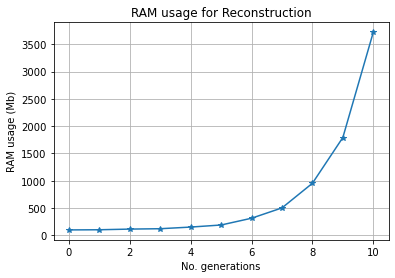

In [5]:
plt.plot(range(n_generations_to_test), mem, "*-")
plt.xlabel("No. generations")
plt.ylabel("RAM usage (Mb)")
plt.title("RAM usage for Reconstruction")
plt.grid(True)
plt.show()

### Path Reconstruction Test:

In [6]:
simul = Simulator(chromosome_table, number_of_generations, average_events_number, cumulative_list, \
     n_events_distrib, del_len_distrib, ins_len_distrib, transl_len_distrib, dupl_len_distrib )

In [8]:
"""
How to select the doughters in the path?
0 = left
1 = right
"""
path = [0, 0, 0, 1, 1, 1, 0, 0, 0, 0]

leaf = simul.path_reconstructor(path, chromosome_table)

In [9]:
leaf.data.DNA.CHRs

[Chromosome(ID: 1, length: 791352, sequence: 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA